In [3]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/sample_data/Student_Performance.csv')

In [5]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
data = pd.get_dummies(data)
data= data.astype('float32')

In [7]:
data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7.0,99.0,9.0,1.0,91.0,0.0,1.0
1,4.0,82.0,4.0,2.0,65.0,1.0,0.0
2,8.0,51.0,7.0,2.0,45.0,0.0,1.0
3,5.0,52.0,5.0,2.0,36.0,0.0,1.0
4,7.0,75.0,8.0,5.0,66.0,1.0,0.0


In [8]:
x = data.drop('Performance Index',axis=1)
y = data['Performance Index']

In [9]:
import sklearn
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

In [10]:
y_test.head()

,Performance Index
2077,57.0
9207,70.0
6755,66.0
6704,73.0
9528,78.0


In [11]:
x_train.head()
y_train = tf.cast(y_train, tf.float32)
y_test = tf.cast(y_test, tf.float32)


In [12]:
tf.random.set_seed(22)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),

    tf.keras.layers.Dense(64, activation = 'leaky_relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),

    tf.keras.layers.Dense(128, activation = 'leaky_relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),

     tf.keras.layers.Dense(64, activation = 'leaky_relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),

    tf.keras.layers.Dense(1, activation = 'leaky_relu')
])

model.compile(loss = tf.keras.losses.MeanSquaredError(),
              optimizer = tf.keras.optimizers.Lion(learning_rate=0.001))

In [14]:
model.fit(x_train,y_train,epochs=50, verbose=1, validation_data=(x_test,y_test))

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.5481 - val_loss: 7.3968
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.2272 - val_loss: 7.0966
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2177 - val_loss: 6.9441
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.1296 - val_loss: 6.8085
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0172 - val_loss: 6.8144
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0195 - val_loss: 6.6389
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.8379 - val_loss: 6.5598
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.9149 - val_loss: 6.5294
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.6782 - val_loss: 6.4050
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3653 - val_loss: 6.2002
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.4999 - val_loss: 5.6576
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [15]:
loss = model.evaluate(x_test,y_test)
loss

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.7751


4.9583210945129395

In [18]:

training_results = model.fit(x_train, y_train, epochs =100, verbose = 0, validation_data=(x_test, y_test))

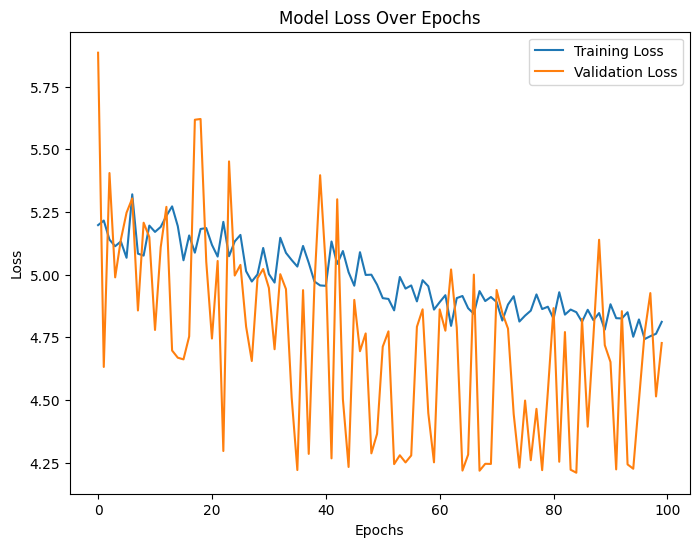

In [19]:
plt.figure(figsize=(8,6))
plt.plot(training_results.history['loss'], label='Training Loss')
plt.plot(training_results.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()